# LeNet-5 Test

In this notebook, we train and test a LeNet-1 model with the MNIST dataset. The model was written with pytorch.

In [21]:
import torch


class LeNet5(torch.nn.Module):
    """
    The LeNet-5 module.
    """

    def __init__(self):

        # Mandatory call to super class module.
        super(LeNet5, self).__init__()

        # Layer 1 - Conv2d(4, 5x5) - Nx1x32x32 -> Nx6x28x28
        self.c1 = torch.nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)

        # Layer 2 - AvgPool2d(2x2) - Nx6x28x28 -> Nx6x14x14
        self.s2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)

        # Layer 3 - Conv2d(12, 5x5) - Nx6x14x14 -> Nx16x10x10
        self.c3 = torch.nn.Conv2d(
            in_channels=6, out_channels=16, kernel_size=5)

        # Layer 4 - AvgPool2d(2x2) - Nx16x10x10 -> Nx16x5x5
        self.s4 = torch.nn.AvgPool2d(kernel_size=2, stride=2)

        # Layer 5 - FullyConnected(120) - Nx16x5x5 -> Nx1x120
        self.f5 = torch.nn.Linear(in_features=16*5*5, out_features=120)

        # Layer 6 - FullyConnected(10) - Nx1x120 -> Nx1x84
        self.f6 = torch.nn.Linear(in_features=120, out_features=84)

        # Layer 7 - FullyConnected(10) - Nx1x84 -> Nx1x10
        self.f7 = torch.nn.Linear(in_features=84, out_features=10)

    def forward(self, x):

        # Forward pass through layer 1, and tanh activation
        x = torch.tanh(self.c1(x))

        # Forward pass through layer 2, and sigmoid activation
        x = torch.sigmoid(self.s2(x))

        # Forward pass through layer 3, and tanh activation
        x = torch.tanh(self.c3(x))

        # Forward pass through layer 4,  and sigmoid activation
        x = torch.sigmoid(self.s4(x))
        x = torch.flatten(x, 1)

        # Forward pass through layer 5, and tanh activation
        x =  torch.tanh(self.f5(x))

        # Forward pass through layer 6, and tanh activation
        x =  torch.tanh(self.f6(x))

        # Forward pass through layer 7, and softmax activation
        return torch.nn.functional.softmax(self.f7(x))


In [22]:
import torchvision

transform = torchvision.transforms.Compose(
    [torchvision.transforms.Resize((32,32)), torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0,), (1,)), ]
)

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = [x for x in range(10)]

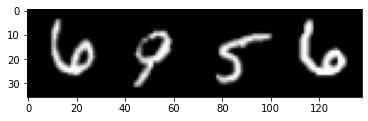

    6     9     5     6


In [23]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [24]:
model = LeNet5()

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [25]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.302
[1,  4000] loss: 2.301


KeyboardInterrupt: 

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

outputs = model(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))